In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# EDA

In [3]:
train_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
0   1       2596      51      3                               258  \
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
0                               0                              510  \
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32   
0            221             232            148  ...            0  \
1            220             235            151  ...            0   
2            234             238            135  ...            0   
3            238             238            122  ...            0   
4            220             234            150  ...            0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37   
0            0            0            0            0            0  \
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [5]:
train_df.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [6]:
train_df["Cover_Type"].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [7]:
train_df["Cover_Type"] = train_df["Cover_Type"] - 1

In [8]:
# Number of instances belonging to each class

train_df.groupby('Cover_Type').size()

Cover_Type
0    2160
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
dtype: int64

In [9]:
df_hist = train_df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]

In [10]:
df_hist.describe().T

count         mean          std     min   
Elevation                           15120.0  2749.322553   417.678187  1863.0  \
Aspect                              15120.0   156.676653   110.085801     0.0   
Slope                               15120.0    16.501587     8.453927     0.0   
Horizontal_Distance_To_Hydrology    15120.0   227.195701   210.075296     0.0   
Vertical_Distance_To_Hydrology      15120.0    51.076521    61.239406  -146.0   
Horizontal_Distance_To_Roadways     15120.0  1714.023214  1325.066358     0.0   
Hillshade_9am                       15120.0   212.704299    30.561287     0.0   
Hillshade_Noon                      15120.0   218.965608    22.801966    99.0   
Hillshade_3pm                       15120.0   135.091997    45.895189     0.0   
Horizontal_Distance_To_Fire_Points  15120.0  1511.147288  1099.936493     0.0   

                                       25%     50%      75%     max  
Elevation                           2376.0  2752.0  3104.00  3849.0  
Aspect                                65.0   126.0   261.00   360.0  
Slope                                 10.0    15.0    22.00    52.0  
Horizontal_Distance_To_Hydrology      67.0   180.0   330.00  1343.0  
Vertical_Distance_To_Hydrology         5.0    32.0    79.00   554.0  
Horizontal_Distance_To_Roadways      764.0  1316.0  2270.00  6890.0  
Hillshade_9am                        196.0   220.0   235.00   254.0  
Hillshade_Noon                       207.0   223.0   235.00   254.0  
Hillshade_3pm                        106.0   138.0   167.00   248.0  
Horizontal_Distance_To_Fire_Points   730.0  1256.0  1988.25  6993.0

array([[<Axes: title={'center': 'Elevation'}>,
        <Axes: title={'center': 'Aspect'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Vertical_Distance_To_Hydrology'}>,
        <Axes: title={'center': 'Horizontal_Distance_To_Roadways'}>],
       [<Axes: title={'center': 'Hillshade_9am'}>,
        <Axes: title={'center': 'Hillshade_Noon'}>,
        <Axes: title={'center': 'Hillshade_3pm'}>],
       [<Axes: title={'center': 'Horizontal_Distance_To_Fire_Points'}>,
        <Axes: >, <Axes: >]], dtype=object)

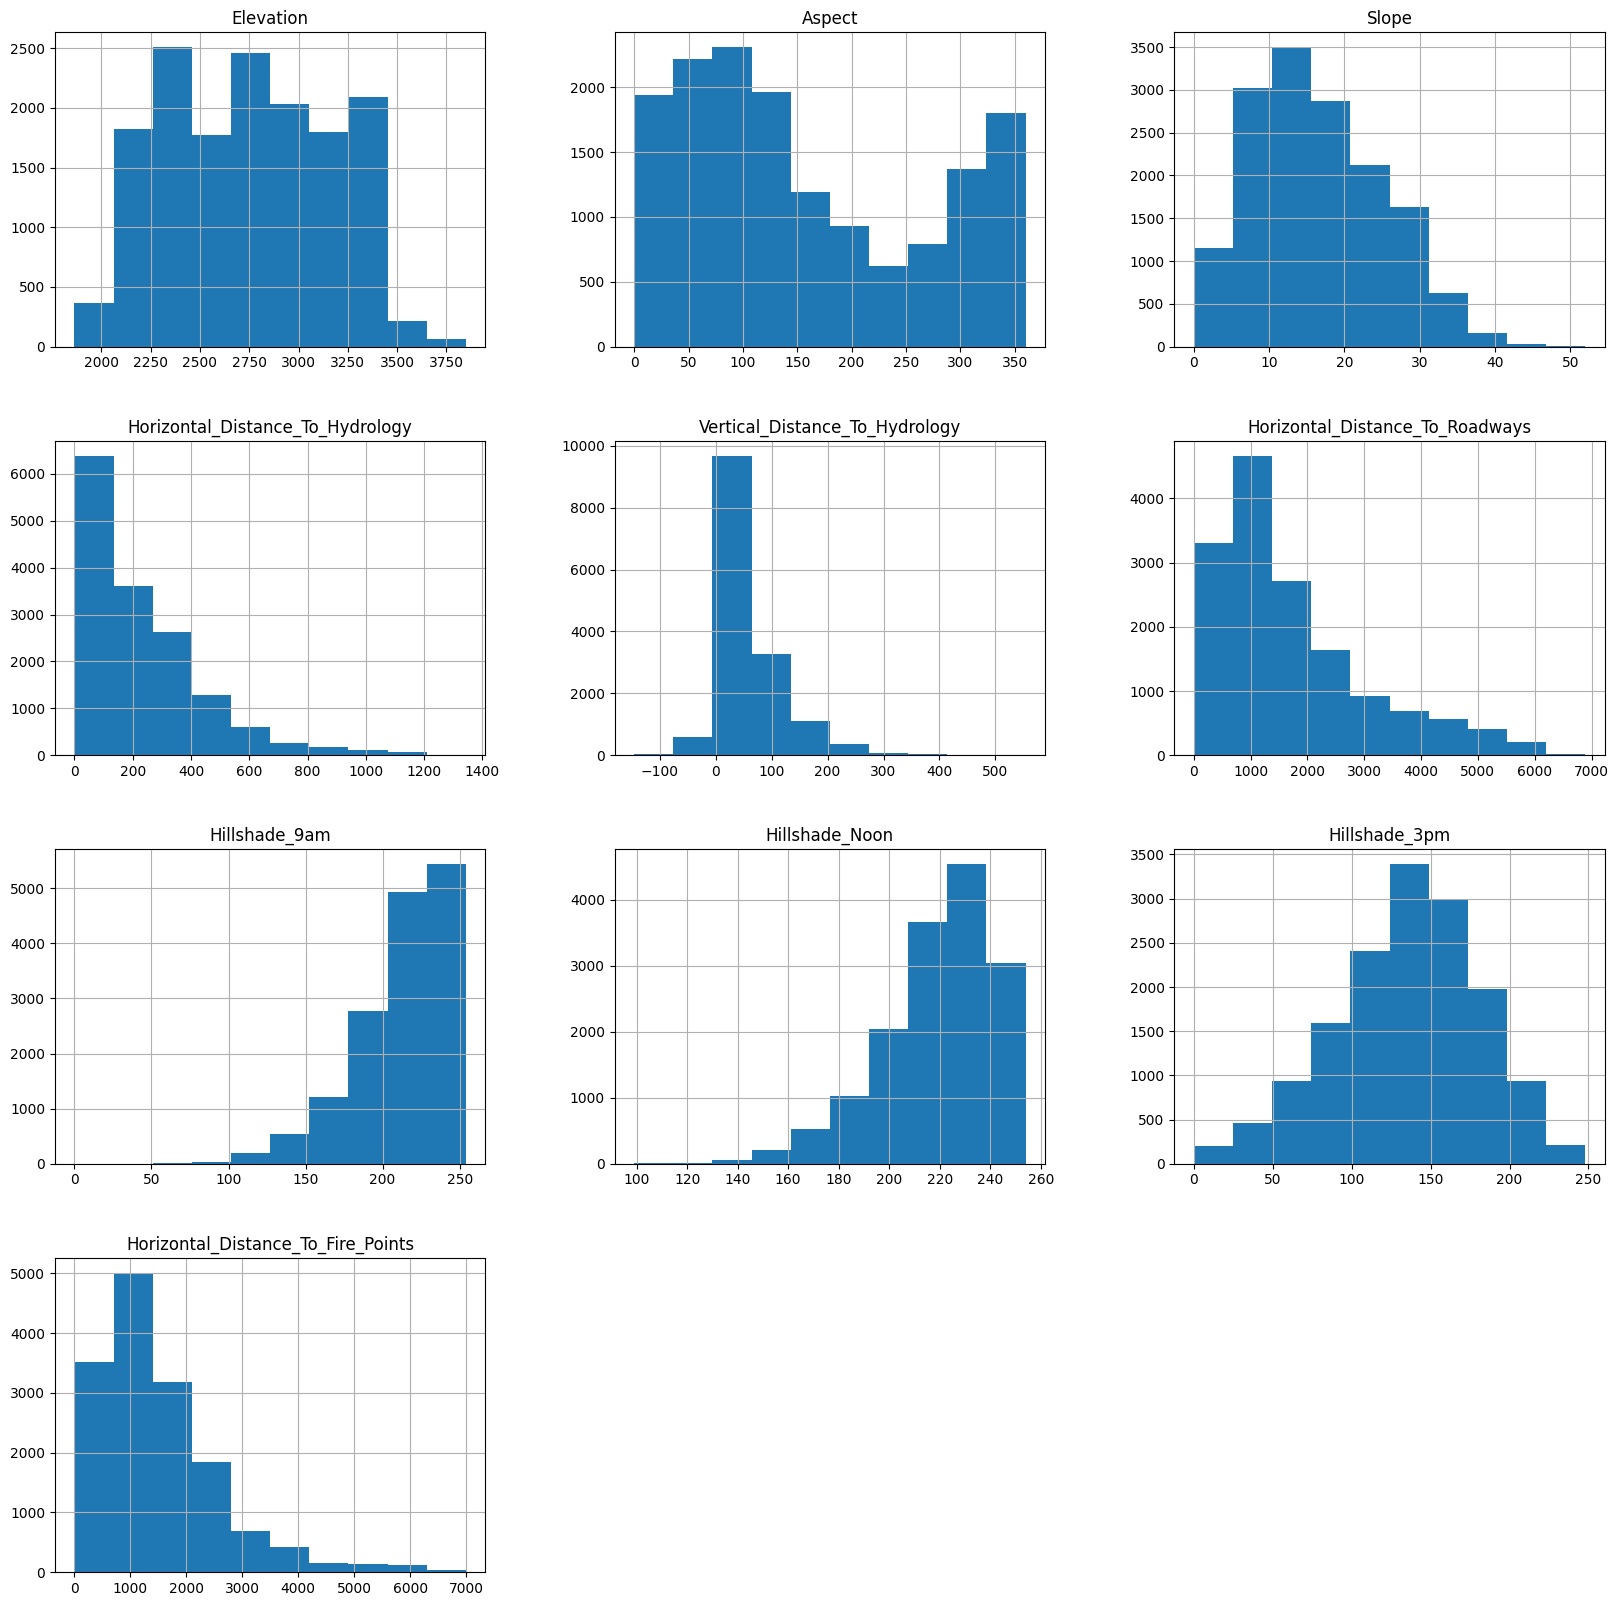

In [11]:
df_hist.hist(figsize=(20,20))

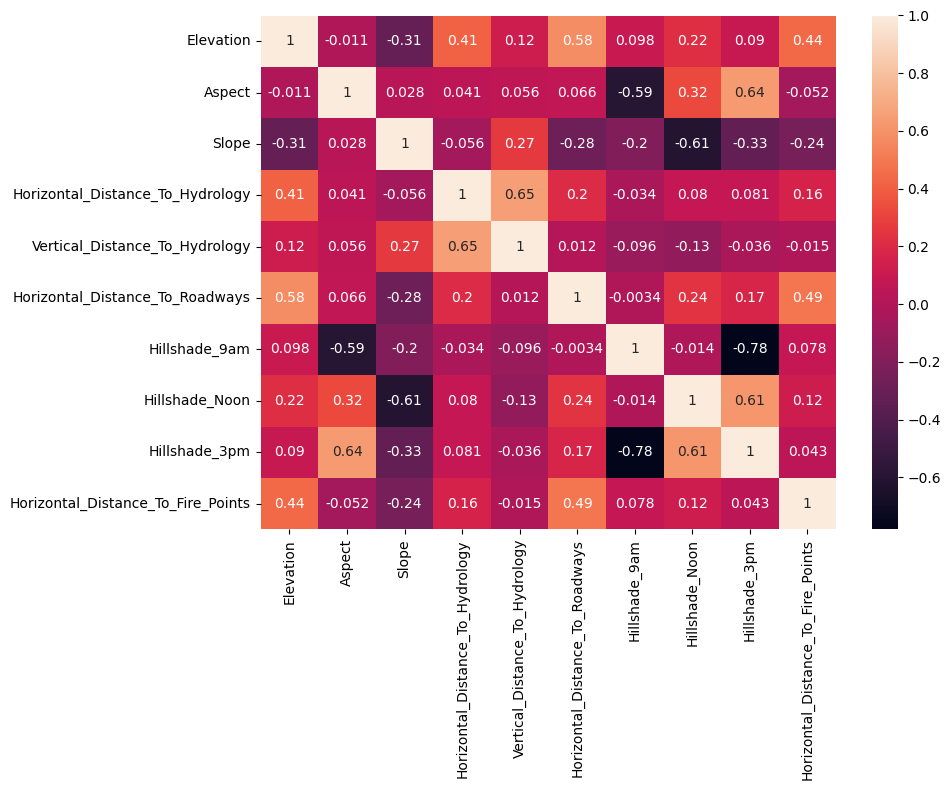

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df_hist.corr(),annot=True)
plt.tight_layout()
plt.show()

In [13]:
df_hist.describe().T

count         mean          std     min   
Elevation                           15120.0  2749.322553   417.678187  1863.0  \
Aspect                              15120.0   156.676653   110.085801     0.0   
Slope                               15120.0    16.501587     8.453927     0.0   
Horizontal_Distance_To_Hydrology    15120.0   227.195701   210.075296     0.0   
Vertical_Distance_To_Hydrology      15120.0    51.076521    61.239406  -146.0   
Horizontal_Distance_To_Roadways     15120.0  1714.023214  1325.066358     0.0   
Hillshade_9am                       15120.0   212.704299    30.561287     0.0   
Hillshade_Noon                      15120.0   218.965608    22.801966    99.0   
Hillshade_3pm                       15120.0   135.091997    45.895189     0.0   
Horizontal_Distance_To_Fire_Points  15120.0  1511.147288  1099.936493     0.0   

                                       25%     50%      75%     max  
Elevation                           2376.0  2752.0  3104.00  3849.0  
Aspect                                65.0   126.0   261.00   360.0  
Slope                                 10.0    15.0    22.00    52.0  
Horizontal_Distance_To_Hydrology      67.0   180.0   330.00  1343.0  
Vertical_Distance_To_Hydrology         5.0    32.0    79.00   554.0  
Horizontal_Distance_To_Roadways      764.0  1316.0  2270.00  6890.0  
Hillshade_9am                        196.0   220.0   235.00   254.0  
Hillshade_Noon                       207.0   223.0   235.00   254.0  
Hillshade_3pm                        106.0   138.0   167.00   248.0  
Horizontal_Distance_To_Fire_Points   730.0  1256.0  1988.25  6993.0

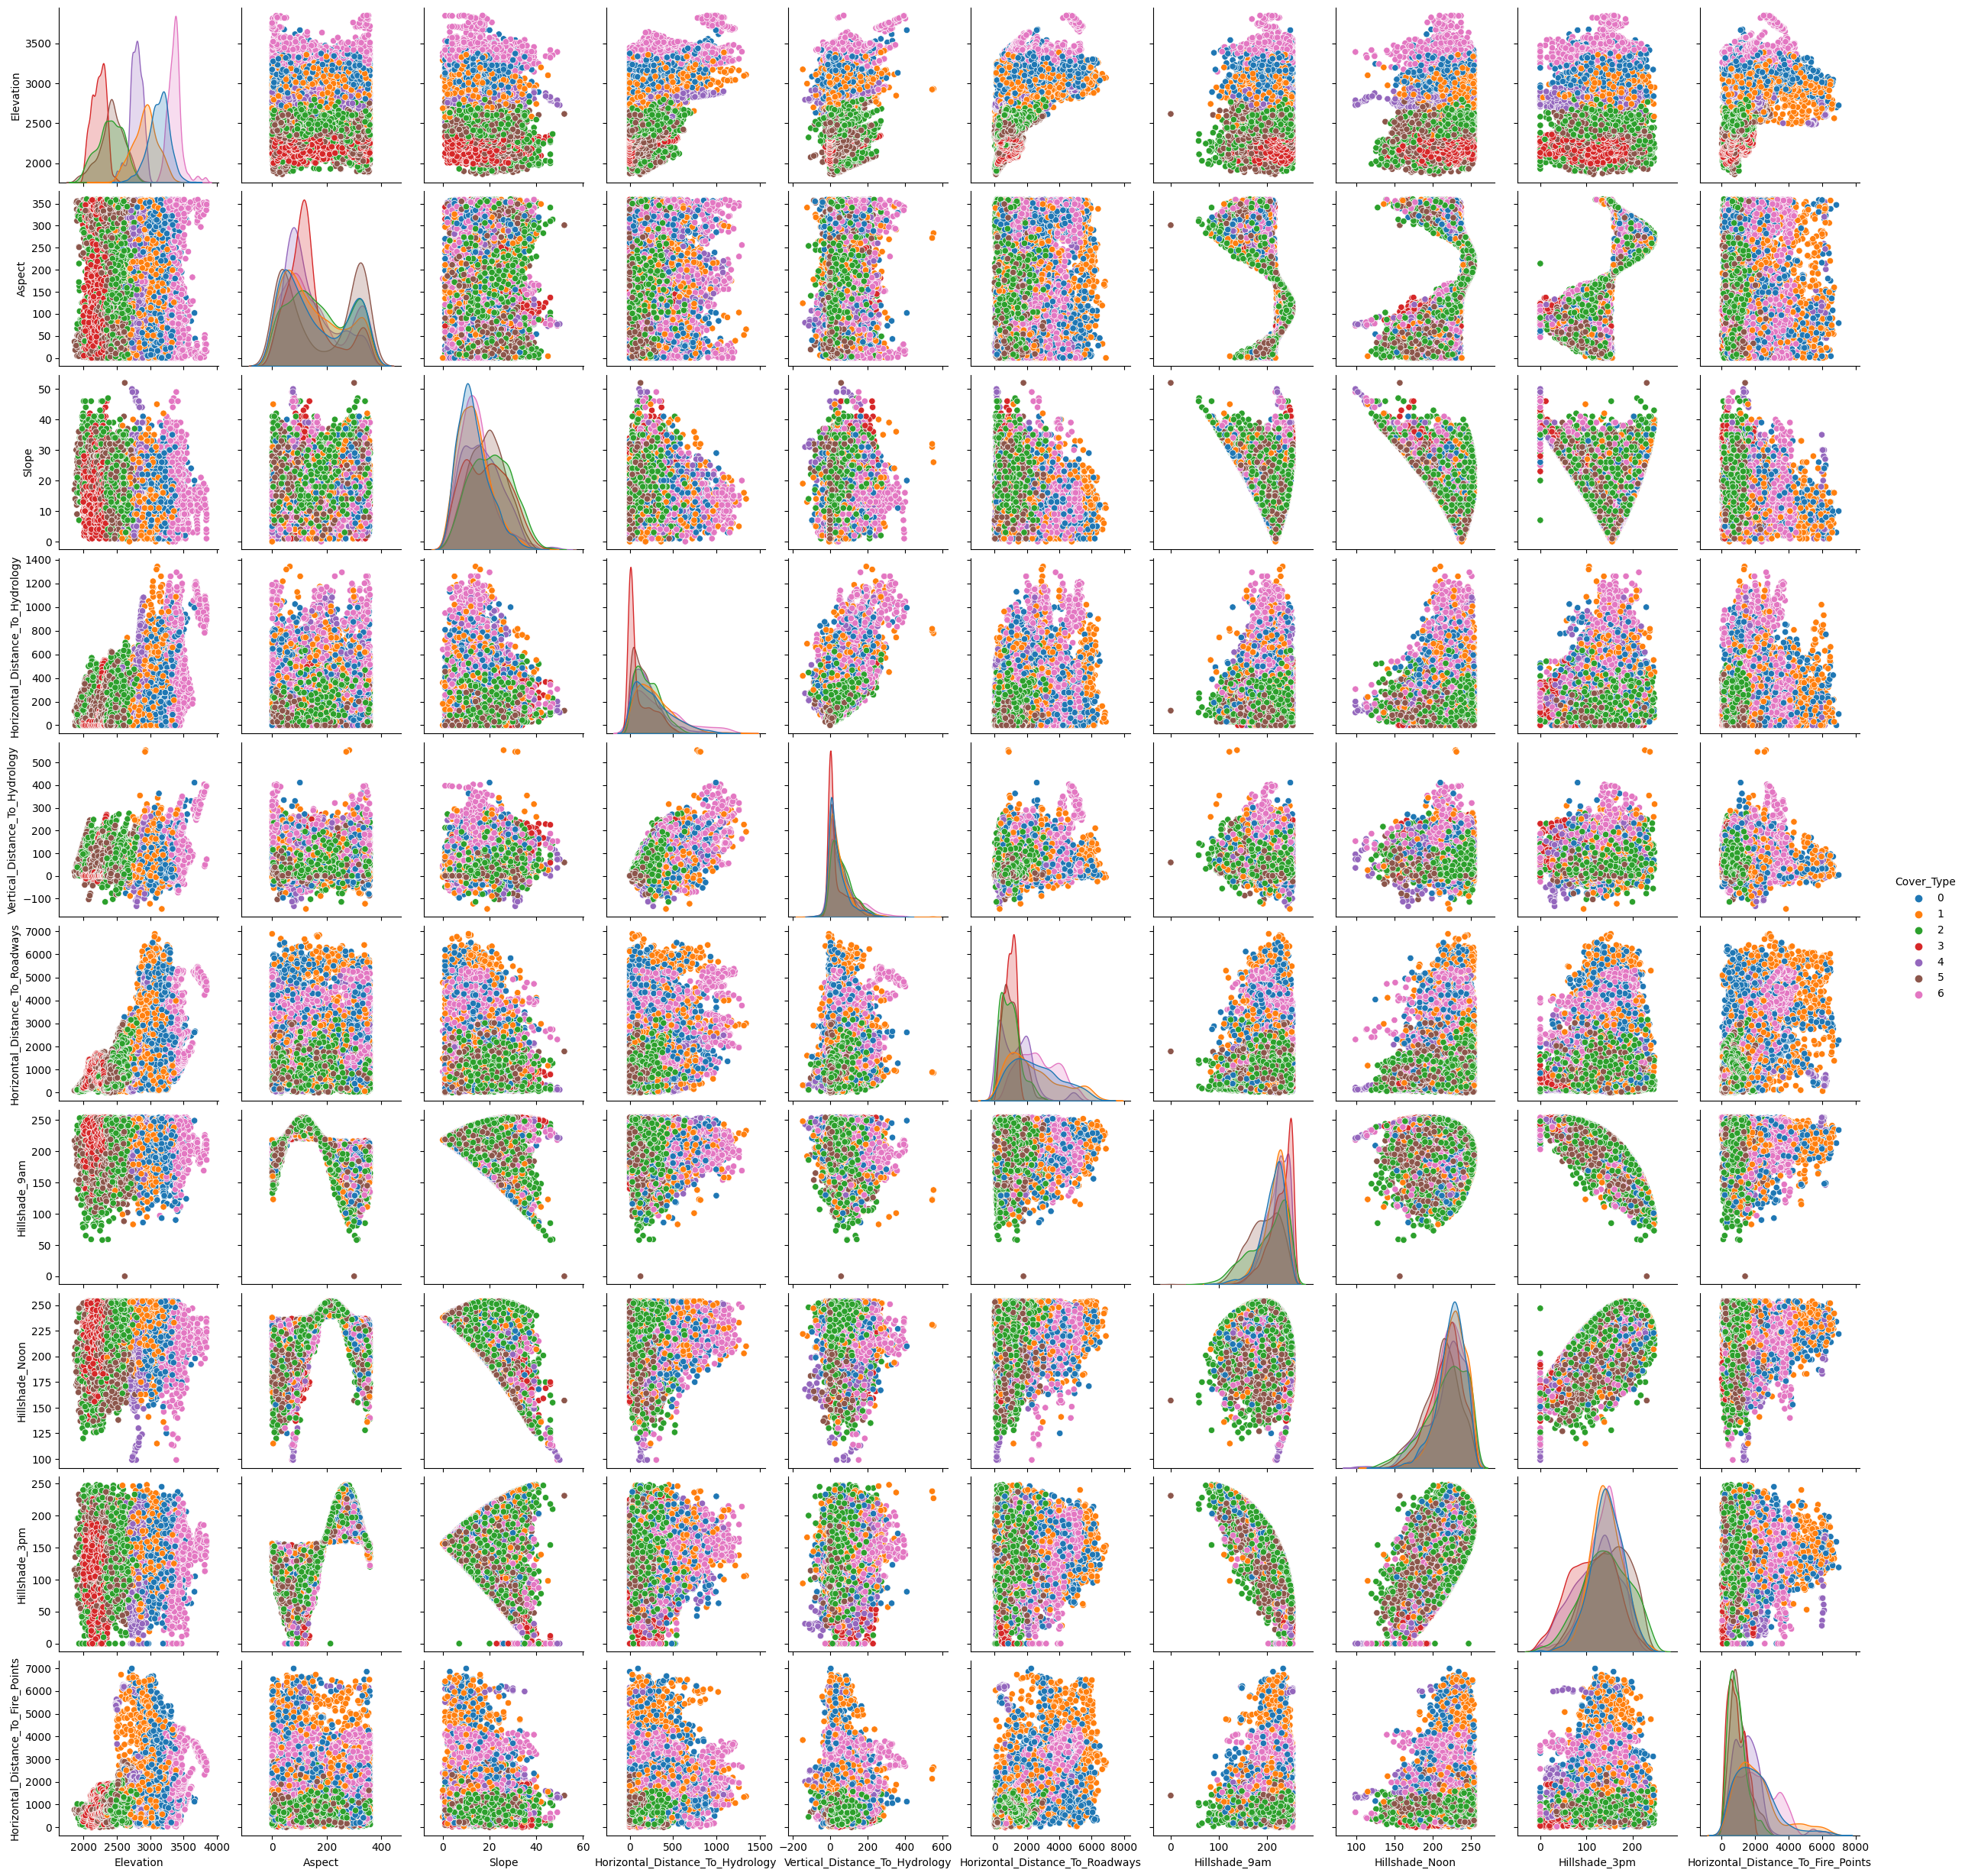

In [14]:
#Relationships Between Continuous Features

sns.pairplot(train_df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Cover_Type"]],hue="Cover_Type",palette="tab10")
plt.show() 

In [15]:
# Find index of wilness_area1 columns
wilderness_area1_index = train_df.columns.get_loc("Wilderness_Area1")
wilderness_area4_index = train_df.columns.get_loc("Wilderness_Area4")
print('wilderness area1 index:',wilderness_area1_index)
print('wilderness area4 index:',wilderness_area4_index)
# Find index of soil_type1 and last soil_type columns
soil_type1_index = train_df.columns.get_loc("Soil_Type1")
soil_type40_index = train_df.columns.get_loc("Soil_Type40")
print('soil type1 index:',soil_type1_index)
print('soil type40 index:',soil_type40_index)

wilderness area1 index: 11
wilderness area4 index: 14
soil type1 index: 15
soil type40 index: 54


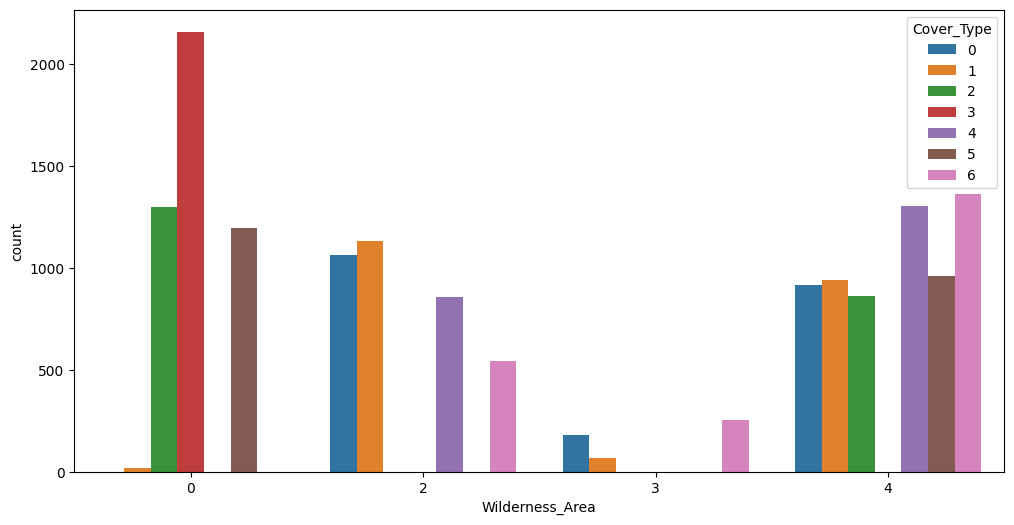

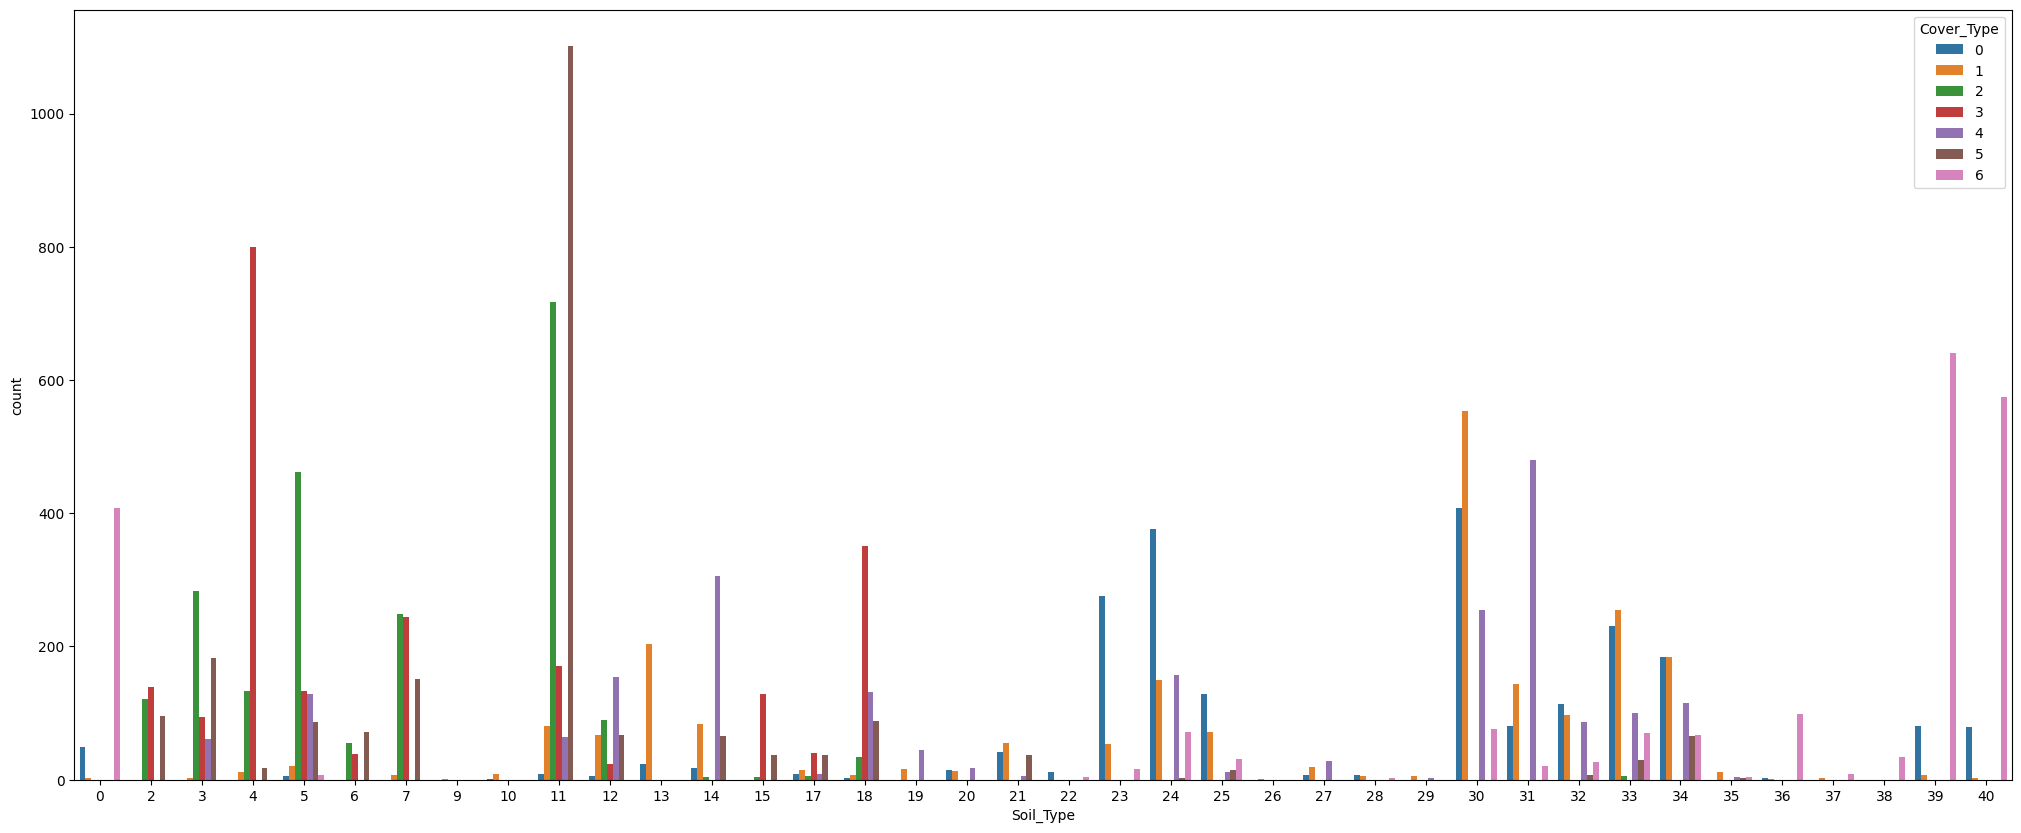

In [16]:
# Group one-hot encoded variables of a category into one single variable

#names of all the columns
cols = train_df.columns

#number of rows=r , number of columns=c
r,c = train_df.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area','Soil_Type','Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 range
    for j in range(wilderness_area1_index,wilderness_area4_index):
        if (train_df.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Category2 range        
    for k in range(soil_type1_index,soil_type40_index):
        if (train_df.iloc[i,k] == 1):
            s=k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w,s,train_df.iloc[i,c-1]]

#Plot for Category1 
plt.rc("figure", figsize=(12, 6))   
sns.countplot(x="Wilderness_Area", hue="Cover_Type", data=data)
plt.show()
#Plot for Category2
plt.rc("figure", figsize=(25, 10))
sns.countplot(x="Soil_Type", hue="Cover_Type", data=data)
plt.show()

# Identify outliers

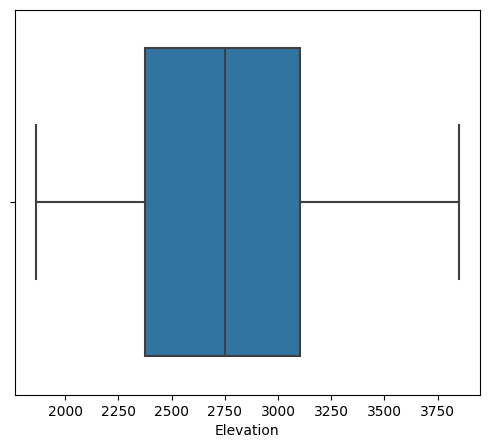

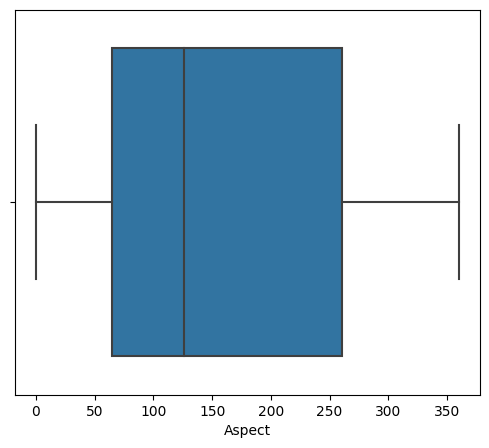

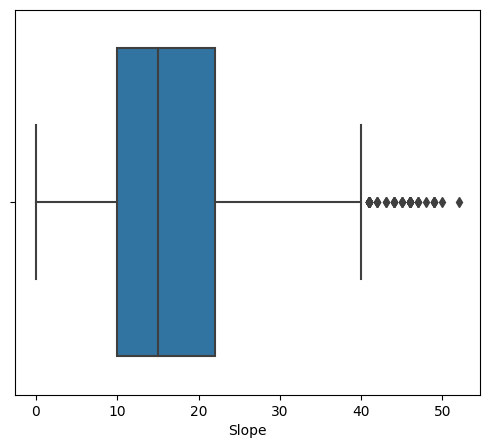

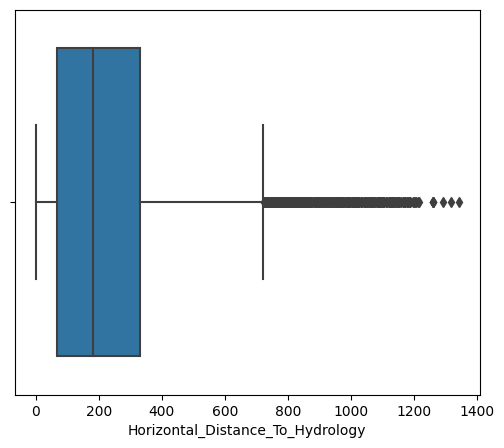

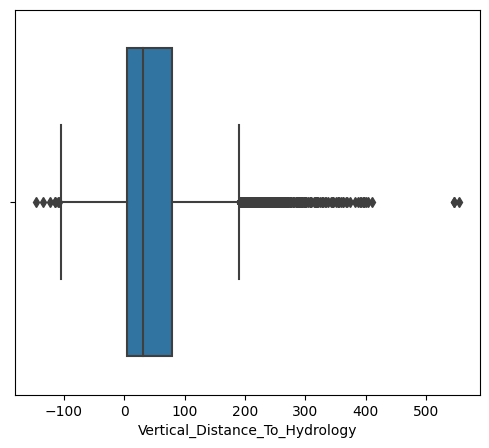

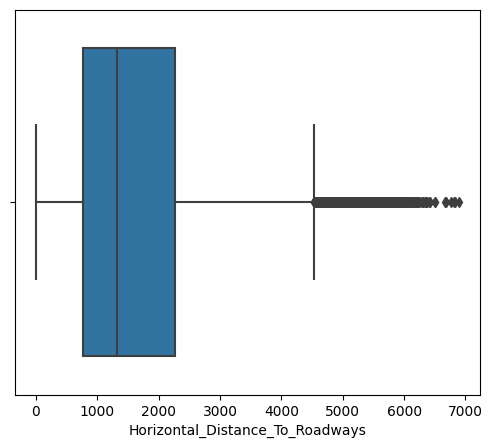

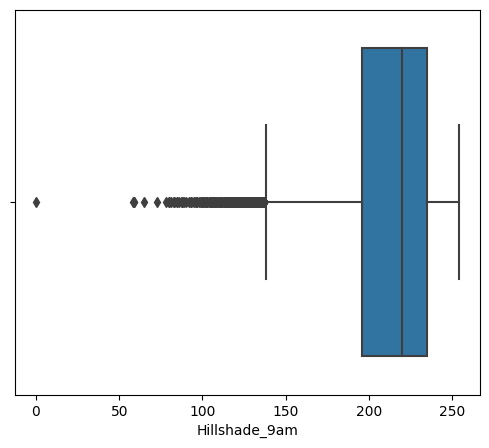

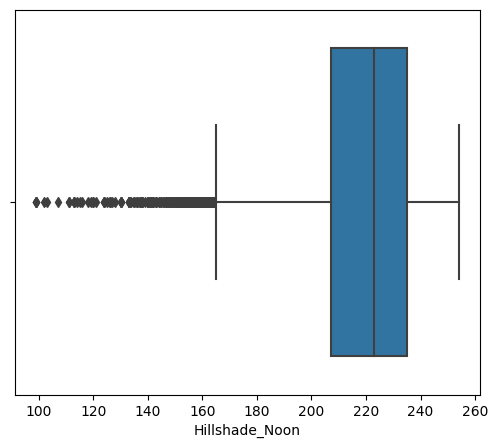

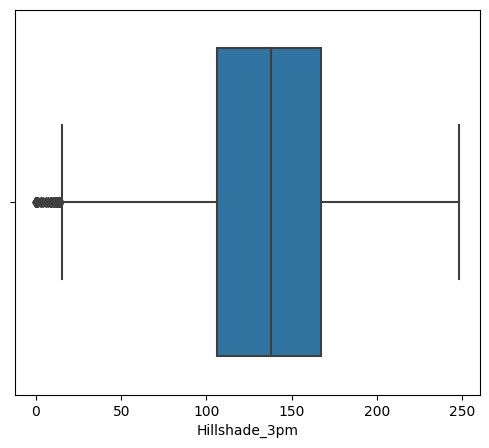

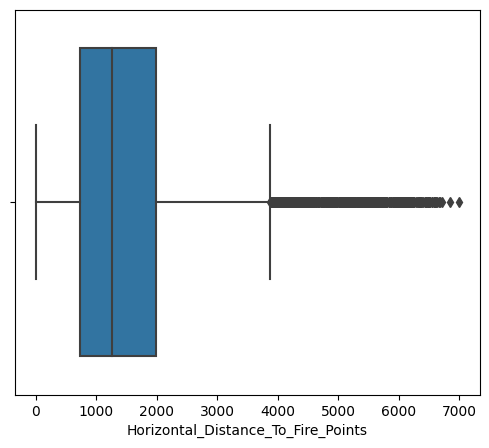

In [17]:
for column in df_hist.columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(x = train_df[column])
    plt.show()

In [18]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
num_col = train_df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]
for i in num_col:
    
    Q1,Q3=train_df[i].quantile(0.25),train_df[i].quantile(0.75)
# identify outliers
    
    IQR=Q3-Q1
    
    lower,upper=Q1-1.5*IQR,Q3+1.5*IQR
    print(i,': \n')
# identify outliers
    outliers = [x for x in train_df[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in train_df[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)
    
print("-"*50)    
    
Outliers=pd.DataFrame({'Feature':list(num_col),'% Of Outliers':out_per})
Outliers

Elevation : 

Identified outliers: 0
Non-outlier observations: 15120
Percent of outlers: 0.0 

Aspect : 

Identified outliers: 0
Non-outlier observations: 15120
Percent of outlers: 0.0 

Slope : 

Identified outliers: 57
Non-outlier observations: 15063
Percent of outlers: 0.376984126984127 

Horizontal_Distance_To_Hydrology : 

Identified outliers: 512
Non-outlier observations: 14608
Percent of outlers: 3.3862433862433865 

Vertical_Distance_To_Hydrology : 

Identified outliers: 586
Non-outlier observations: 14534
Percent of outlers: 3.875661375661376 

Horizontal_Distance_To_Roadways : 

Identified outliers: 830
Non-outlier observations: 14290
Percent of outlers: 5.489417989417989 

Hillshade_9am : 

Identified outliers: 408
Non-outlier observations: 14712
Percent of outlers: 2.6984126984126986 

Hillshade_Noon : 

Identified outliers: 393
Non-outlier observations: 14727
Percent of outlers: 2.5992063492063493 

Hillshade_3pm : 

Identified outliers: 124
Non-outlier observations: 14996

Feature  % Of Outliers
0                           Elevation       0.000000
1                              Aspect       0.000000
2                               Slope       0.376984
3    Horizontal_Distance_To_Hydrology       3.386243
4      Vertical_Distance_To_Hydrology       3.875661
5     Horizontal_Distance_To_Roadways       5.489418
6                       Hillshade_9am       2.698413
7                      Hillshade_Noon       2.599206
8                       Hillshade_3pm       0.820106
9  Horizontal_Distance_To_Fire_Points       4.265873

# Remove outliers

In [19]:
for column in df_hist.columns:
    q75,q25 = np.percentile(train_df.loc[:,column],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    train_df.loc[train_df[column] < min,column] = np.nan
    train_df.loc[train_df[column] > max,column] = np.nan

In [20]:
train_df.isna().sum()[:11]

Id                                      0
Elevation                               0
Aspect                                  0
Slope                                  57
Horizontal_Distance_To_Hydrology      512
Vertical_Distance_To_Hydrology        586
Horizontal_Distance_To_Roadways       830
Hillshade_9am                         408
Hillshade_Noon                        393
Hillshade_3pm                         124
Horizontal_Distance_To_Fire_Points    645
dtype: int64

In [21]:
train_df.dropna(inplace=True)

In [22]:
for column in train_df.columns:
    print(f"{column} has unique values ({train_df[column].nunique()})")

Id has unique values (12259)
Elevation has unique values (1571)
Aspect has unique values (361)
Slope has unique values (41)
Horizontal_Distance_To_Hydrology has unique values (195)
Vertical_Distance_To_Hydrology has unique values (272)
Horizontal_Distance_To_Roadways has unique values (2455)
Hillshade_9am has unique values (117)
Hillshade_Noon has unique values (90)
Hillshade_3pm has unique values (219)
Horizontal_Distance_To_Fire_Points has unique values (2064)
Wilderness_Area1 has unique values (2)
Wilderness_Area2 has unique values (2)
Wilderness_Area3 has unique values (2)
Wilderness_Area4 has unique values (2)
Soil_Type1 has unique values (2)
Soil_Type2 has unique values (2)
Soil_Type3 has unique values (2)
Soil_Type4 has unique values (2)
Soil_Type5 has unique values (2)
Soil_Type6 has unique values (2)
Soil_Type7 has unique values (1)
Soil_Type8 has unique values (1)
Soil_Type9 has unique values (2)
Soil_Type10 has unique values (2)
Soil_Type11 has unique values (2)
Soil_Type12 

In [23]:
for column in train_df.columns:
    if(train_df[column].nunique() == 1):
        print(column)
        train_df.drop([column],axis=1,inplace=True)
        test_df.drop([column],axis=1,inplace=True)

Soil_Type7
Soil_Type8
Soil_Type15


# Check outliers

In [24]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
out_per=[]
num_col = train_df[["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"]]
for i in num_col:
    
    Q1,Q3=train_df[i].quantile(0.25),train_df[i].quantile(0.75)
# identify outliers
    
    IQR=Q3-Q1
    
    lower,upper=Q1-1.5*IQR,Q3+1.5*IQR
    print(i,': \n')
# identify outliers
    outliers = [x for x in train_df[i] if x < lower or x > upper]
    
    num_out=len(outliers)
    print('Identified outliers: %d' % num_out)
    outliers_removed = [x for x in train_df[i] if x >= lower and x <= upper]
    num_nout=len(outliers_removed)
    print('Non-outlier observations: %d' % num_nout)
    outlier_percent=(num_out/(num_out+num_nout))*100
    print('Percent of outlers:',outlier_percent ,'\n')
    out_per.append(outlier_percent)
    
print("-"*50)    
    
Outliers=pd.DataFrame({'Feature':list(num_col),'% Of Outliers':out_per})
Outliers

Elevation : 

Identified outliers: 0
Non-outlier observations: 12259
Percent of outlers: 0.0 

Aspect : 

Identified outliers: 0
Non-outlier observations: 12259
Percent of outlers: 0.0 

Slope : 

Identified outliers: 16
Non-outlier observations: 12243
Percent of outlers: 0.1305163553307774 

Horizontal_Distance_To_Hydrology : 

Identified outliers: 94
Non-outlier observations: 12165
Percent of outlers: 0.7667835875683171 

Vertical_Distance_To_Hydrology : 

Identified outliers: 186
Non-outlier observations: 12073
Percent of outlers: 1.5172526307202872 

Horizontal_Distance_To_Roadways : 

Identified outliers: 381
Non-outlier observations: 11878
Percent of outlers: 3.1079207113141365 

Hillshade_9am : 

Identified outliers: 63
Non-outlier observations: 12196
Percent of outlers: 0.5139081491149359 

Hillshade_Noon : 

Identified outliers: 67
Non-outlier observations: 12192
Percent of outlers: 0.5465372379476303 

Hillshade_3pm : 

Identified outliers: 0
Non-outlier observations: 12259
P

Feature  % Of Outliers
0                           Elevation       0.000000
1                              Aspect       0.000000
2                               Slope       0.130516
3    Horizontal_Distance_To_Hydrology       0.766784
4      Vertical_Distance_To_Hydrology       1.517253
5     Horizontal_Distance_To_Roadways       3.107921
6                       Hillshade_9am       0.513908
7                      Hillshade_Noon       0.546537
8                       Hillshade_3pm       0.000000
9  Horizontal_Distance_To_Fire_Points       1.272534

In [25]:
train_corr=train_df.corr()

In [26]:
train_corr['Cover_Type'].abs().sort_values(ascending=False)

Cover_Type                            1.000000
Soil_Type39                           0.248558
Soil_Type38                           0.240223
Soil_Type40                           0.191029
Soil_Type23                           0.189273
Soil_Type22                           0.188227
Soil_Type29                           0.161476
Soil_Type32                           0.145191
Wilderness_Area1                      0.145163
Soil_Type10                           0.144364
Soil_Type12                           0.122623
Soil_Type35                           0.117003
Soil_Type24                           0.105401
Hillshade_Noon                        0.096576
Soil_Type33                           0.089124
Soil_Type31                           0.087289
Soil_Type37                           0.076198
Slope                                 0.071943
Wilderness_Area4                      0.066919
Horizontal_Distance_To_Hydrology      0.057925
Soil_Type4                            0.047122
Wilderness_Ar

In [27]:
#Drop the first column 'Id' since it just has serial numbers. Not useful in the prediction process.
train_df = train_df.drop(['Id'], axis=1)
train_df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
184     3221.0   292.0    3.0                             424.0  \
188     2518.0   107.0    5.0                             360.0   
193     3182.0   116.0    7.0                             579.0   
195     2515.0    90.0    9.0                             313.0   
201     3231.0    45.0    4.0                             648.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
184                            49.0                           4401.0  \
188                            39.0                            553.0   
193                            10.0                           4425.0   
195                            39.0                            511.0   
201                            59.0                           4173.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm   
184          212.0           238.0          165.0  \
188          229.0           234.0          139.0   
193          233.0           233.0          133.0   
195          233.0           227.0          125.0   
201          221.0           231.0          147.0   

     Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33   
184                              1710.0  ...            0            0  \
188                              3522.0  ...            0            0   
193                              1854.0  ...            0            0   
195                              3451.0  ...            0            0   
201                              1921.0  ...            0            0   

     Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38   
184            0            0            0            0            0  \
188            0            0            0            0            0   
193            0            0            0            0            0   
195            0            0            0            0            0   
201            0            0            0            0            0   

     Soil_Type39  Soil_Type40  Cover_Type  
184            0            0           0  
188            0            0           1  
193            0            0           0  
195            0            0           1  
201            0            0           0  

[5 rows x 52 columns]

In [28]:
train_df['soil_type38,39']=train_df['Soil_Type38']+train_df['Soil_Type39']
train_df['soil_38_Wilde_area_1']=train_df['Soil_Type38']+train_df['Wilderness_Area1']
train_df['soil_39_Wilde_area_1']=train_df['Soil_Type39']+train_df['Wilderness_Area1']

test_df['soil_type38,39']=test_df['Soil_Type38']+test_df['Soil_Type39']
test_df['soil_38_Wilde_area_1']=test_df['Soil_Type38']+test_df['Wilderness_Area1']
test_df['soil_39_Wilde_area_1']=test_df['Soil_Type39']+test_df['Wilderness_Area1']

In [29]:
train_df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
184     3221.0   292.0    3.0                             424.0  \
188     2518.0   107.0    5.0                             360.0   
193     3182.0   116.0    7.0                             579.0   
195     2515.0    90.0    9.0                             313.0   
201     3231.0    45.0    4.0                             648.0   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
184                            49.0                           4401.0  \
188                            39.0                            553.0   
193                            10.0                           4425.0   
195                            39.0                            511.0   
201                            59.0                           4173.0   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm   
184          212.0           238.0          165.0  \
188          229.0           234.0          139.0   
193          233.0           233.0          133.0   
195          233.0           227.0          125.0   
201          221.0           231.0          147.0   

     Horizontal_Distance_To_Fire_Points  ...  Soil_Type35  Soil_Type36   
184                              1710.0  ...            0            0  \
188                              3522.0  ...            0            0   
193                              1854.0  ...            0            0   
195                              3451.0  ...            0            0   
201                              1921.0  ...            0            0   

     Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type   
184            0            0            0            0           0  \
188            0            0            0            0           1   
193            0            0            0            0           0   
195            0            0            0            0           1   
201            0            0            0            0           0   

     soil_type38,39  soil_38_Wilde_area_1  soil_39_Wilde_area_1  
184               0                     1                     1  
188               0                     1                     1  
193               0                     1                     1  
195               0                     1                     1  
201               0                     1                     1  

[5 rows x 55 columns]

In [30]:
#importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for column in df_hist.columns:
    train_df[column] = scaler.fit_transform(train_df[[column]])

In [31]:
train_df.head()

Elevation    Aspect  Slope  Horizontal_Distance_To_Hydrology   
184   0.762921  0.811111  0.075                          0.587258  \
188   0.367978  0.297222  0.125                          0.498615   
193   0.741011  0.322222  0.175                          0.801939   
195   0.366292  0.250000  0.225                          0.433518   
201   0.768539  0.125000  0.100                          0.897507   

     Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
184                        0.520408                         0.972382  \
188                        0.486395                         0.122183   
193                        0.387755                         0.977684   
195                        0.486395                         0.112903   
201                        0.554422                         0.922006   

     Hillshade_9am  Hillshade_Noon  Hillshade_3pm   
184       0.637931        0.820225       0.688073  \
188       0.784483        0.775281       0.568807   
193       0.818966        0.764045       0.541284   
195       0.818966        0.696629       0.504587   
201       0.715517        0.741573       0.605505   

     Horizontal_Distance_To_Fire_Points  ...  Soil_Type35  Soil_Type36   
184                            0.441975  ...            0            0  \
188                            0.910313  ...            0            0   
193                            0.479194  ...            0            0   
195                            0.891962  ...            0            0   
201                            0.496511  ...            0            0   

     Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type   
184            0            0            0            0           0  \
188            0            0            0            0           1   
193            0            0            0            0           0   
195            0            0            0            0           1   
201            0            0            0            0           0   

     soil_type38,39  soil_38_Wilde_area_1  soil_39_Wilde_area_1  
184               0                     1                     1  
188               0                     1                     1  
193               0                     1                     1  
195               0                     1                     1  
201               0                     1                     1  

[5 rows x 55 columns]

In [32]:
X = train_df.drop(["Cover_Type"],axis=1)
y = train_df["Cover_Type"]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.2, 
                                                    random_state=1984)

In [34]:
# from sklearn.linear_model import SGDClassifier
# #Hyperparameter tuning for SGDClassifier
# param_grid = {'loss':['hinge','log','modified_huber','squared_hinge','perceptron'],
#                 'penalty':['l2','l1','elasticnet'],
#                 'alpha':[0.0001,0.001,0.01,0.1,1,10,100],
#                 'learning_rate':['constant','optimal','invscaling','adaptive'],
#                 'eta0':[0.0001,0.001,0.01,0.1,1,10,100],
#                 'power_t':[0.1,0.5,1,5,10],
#                 'early_stopping':[True,False],
#                 'validation_fraction':[0.1,0.2,0.3,0.4,0.5],
#                 'n_iter_no_change':[1,2,3,4,5,6,7,8,9,10],
#                 'class_weight':['balanced',None],
#                 'warm_start':[True,False],
#                 'average':[True,False]}
# sgd = SGDClassifier()
# sgd_cv=GridSearchCV(sgd,param_grid,cv=5)
# sgd_cv.fit(X_train,y_train)

# Linear classification

In [35]:
from sklearn.linear_model import SGDClassifier
ls = SGDClassifier()
ls.fit(X_train, y_train)
#predicting with LS
ls_pred = ls.predict(X_test)

In [36]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,ls_pred))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65       313
           1       0.54      0.28      0.36       308
           2       0.56      0.55      0.56       344
           3       0.81      0.86      0.83       403
           4       0.64      0.63      0.63       347
           5       0.61      0.63      0.62       427
           6       0.90      0.85      0.87       310

    accuracy                           0.66      2452
   macro avg       0.66      0.66      0.65      2452
weighted avg       0.66      0.66      0.65      2452



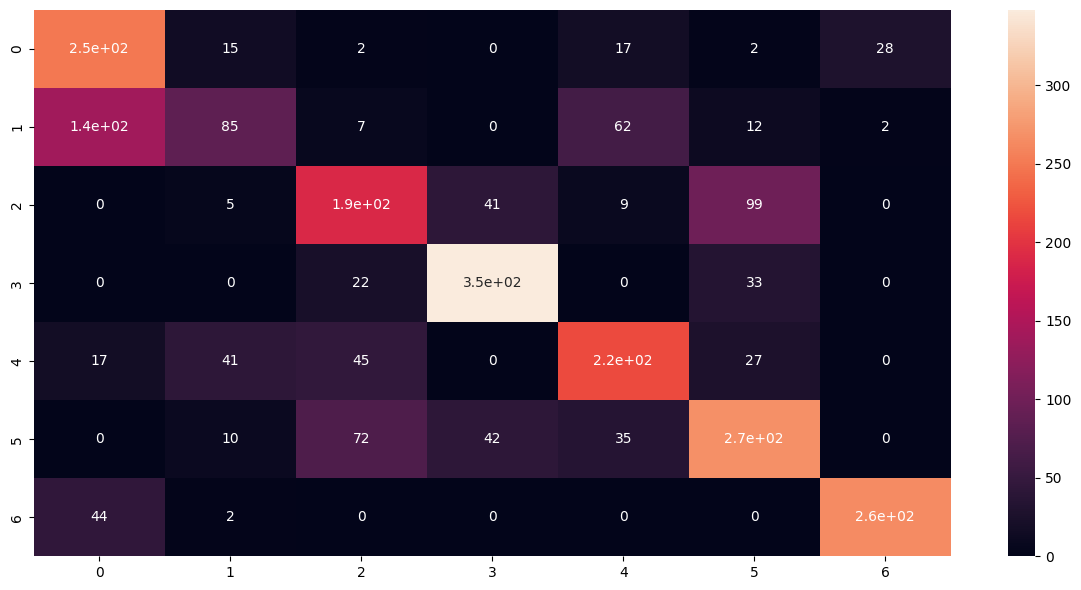

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
con = confusion_matrix(y_test,ls_pred)
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True)
plt.tight_layout()

In [38]:
ls_acc = accuracy_score(y_test,ls_pred)
print(f"The Accuracy is :{ls_acc}")

The Accuracy is :0.6610929853181077


# SVM classification

In [39]:
#SVM classification
svm = SVC()
svm.fit(X_train, y_train)
#predicting with svm
svm_pred = svm.predict(X_test)

In [40]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       313
           1       0.64      0.53      0.58       308
           2       0.63      0.54      0.58       344
           3       0.80      0.96      0.87       403
           4       0.74      0.80      0.77       347
           5       0.70      0.67      0.68       427
           6       0.91      0.87      0.89       310

    accuracy                           0.73      2452
   macro avg       0.72      0.72      0.72      2452
weighted avg       0.72      0.73      0.72      2452



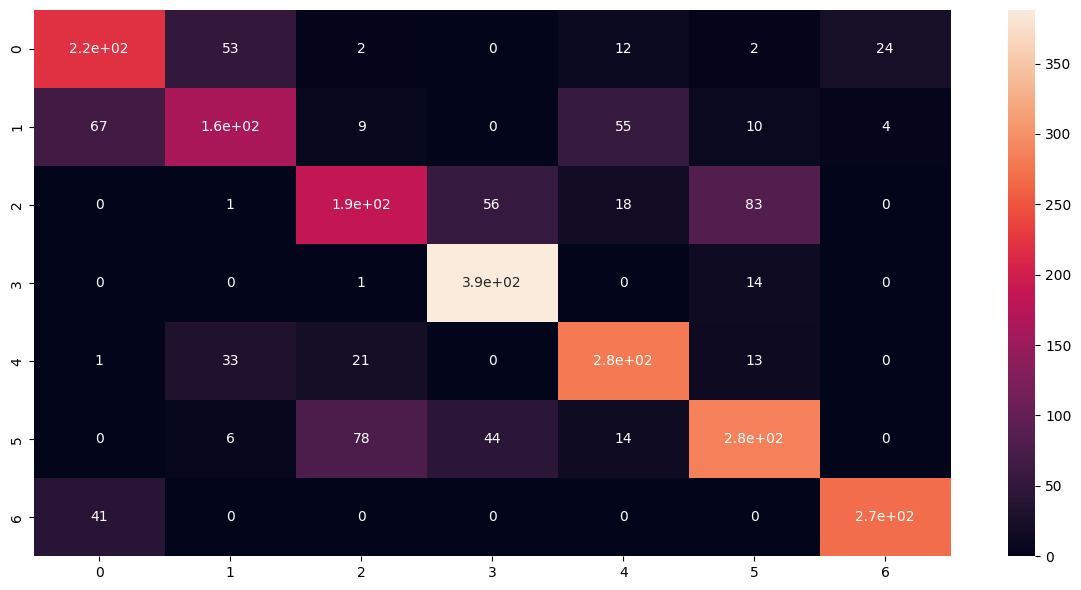

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
con = confusion_matrix(y_test,svm_pred)
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True)
plt.tight_layout()

In [42]:
svm_acc = accuracy_score(y_test,svm_pred)
print(f"The Accuracy is :{svm_acc}")

The Accuracy is :0.7300163132137031


# KNN

In [43]:
#Find the best value of hyperparameter
r = 0
i = 1
k = 1
while i <= math.sqrt(train_df.shape[0]):
    knn= KNeighborsClassifier(i, weights='distance', algorithm='auto' , leaf_size= 20, metric= 'minkowski')  
    knn.fit(X_train, y_train)
    y_pred_knn=knn.predict(X_test)
    r2 = accuracy_score(y_test,y_pred_knn)
    if r2 > r:
        r = r2
        k = i
    i += 1

if(k%2 == 0):
    k=k+1

print("Best value of hyperparameter k:", k)

Best value of hyperparameter k: 1


In [44]:
knn = KNeighborsClassifier(k, weights='distance', algorithm='auto', leaf_size= 20, metric= 'minkowski')  
knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70       313
           1       0.69      0.60      0.64       308
           2       0.75      0.76      0.75       344
           3       0.89      0.93      0.91       403
           4       0.84      0.92      0.88       347
           5       0.83      0.80      0.82       427
           6       0.90      0.97      0.93       310

    accuracy                           0.81      2452
   macro avg       0.81      0.81      0.81      2452
weighted avg       0.81      0.81      0.81      2452



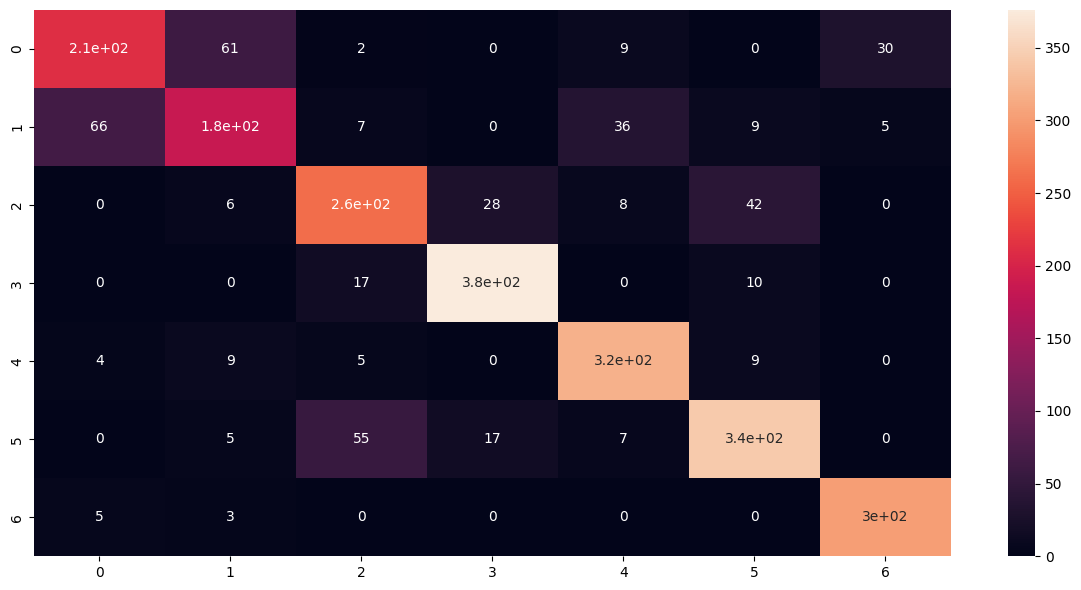

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score
con = confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True)
plt.tight_layout()

In [47]:
knn_acc = accuracy_score(y_test,y_pred_knn)
print(f"The Accuracy is :{knn_acc}")

The Accuracy is :0.814437194127243


# AdaBoost

In [48]:
from sklearn.ensemble import AdaBoostClassifier

# Create the AdaBoost regression model
adaboost_model = AdaBoostClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the GridSearchCV
best_params = grid_search.best_params_

# Create the final AdaBoost model with the best hyperparameters
final_adaboost_model = AdaBoostClassifier(random_state=42, **best_params)

# Fit the final model to the training data
final_adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
adaboost_pred = final_adaboost_model.predict(X_test)

In [49]:
print(classification_report(y_test,adaboost_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       0.00      0.00      0.00       308
           2       0.00      0.00      0.00       344
           3       0.42      1.00      0.59       403
           4       0.54      0.91      0.68       347
           5       0.38      0.18      0.24       427
           6       0.44      1.00      0.61       310

    accuracy                           0.45      2452
   macro avg       0.25      0.44      0.30      2452
weighted avg       0.27      0.45      0.31      2452



/Users/diganto/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diganto/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/diganto/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [50]:
adaboost_acc = accuracy_score(y_test,adaboost_pred)
print(f"The Accuracy is :{adaboost_acc}")

The Accuracy is :0.449836867862969


# Decision Tree

In [120]:
from sklearn.tree import DecisionTreeClassifier
# Create the Decision Tree regression model
tree_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and random state from the GridSearchCV
best_params = grid_search.best_params_
best_random_state = grid_search.best_estimator_.random_state

# Create the final Decision Tree model with the best hyperparameters and random state
final_tree_model = DecisionTreeClassifier(random_state=best_random_state, **best_params)

# Fit the final model to the training data
final_tree_model.fit(X_train, y_train)

y_pred_tree=final_tree_model.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.70      0.67      0.69       313
           1       0.63      0.54      0.58       308
           2       0.70      0.75      0.73       344
           3       0.92      0.92      0.92       403
           4       0.82      0.89      0.86       347
           5       0.82      0.79      0.80       427
           6       0.90      0.96      0.93       310

    accuracy                           0.80      2452
   macro avg       0.79      0.79      0.79      2452
weighted avg       0.79      0.80      0.79      2452



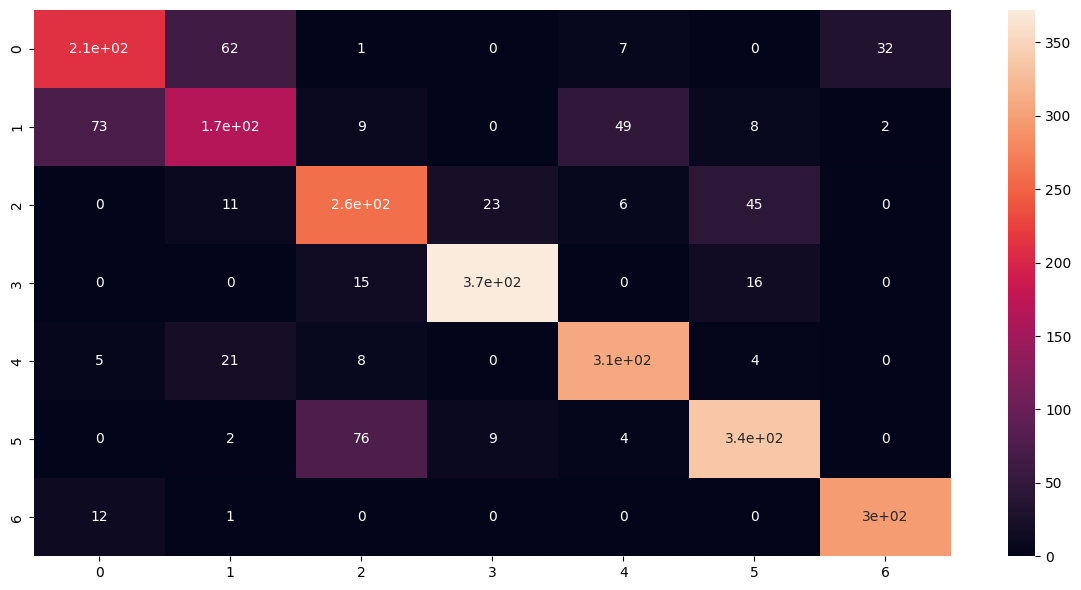

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
con = confusion_matrix(y_test,y_pred_tree)
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True)
plt.tight_layout()

In [54]:
tree_acc = accuracy_score(y_test,y_pred_tree)
print(f"The Accuracy is :{tree_acc}")

The Accuracy is :0.7956769983686787


# MLP

In [55]:
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
mlp_pred = mlp_model.predict(X_test)

/Users/diganto/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [56]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.72      0.65      0.69       313
           1       0.67      0.55      0.60       308
           2       0.67      0.69      0.68       344
           3       0.90      0.96      0.92       403
           4       0.81      0.84      0.83       347
           5       0.78      0.78      0.78       427
           6       0.86      0.98      0.92       310

    accuracy                           0.78      2452
   macro avg       0.77      0.78      0.77      2452
weighted avg       0.78      0.78      0.78      2452



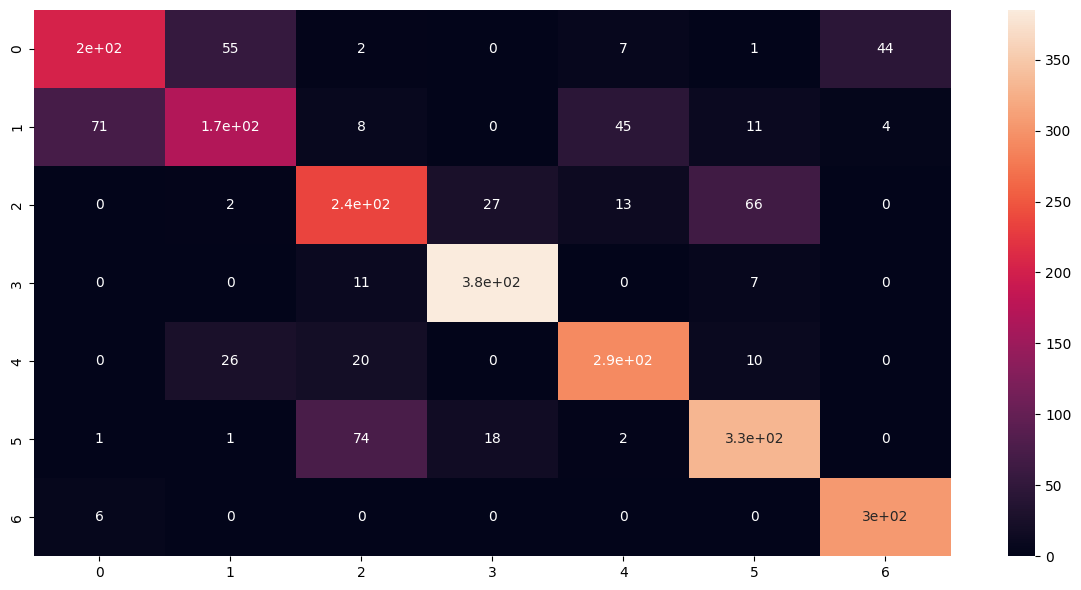

In [57]:
con = confusion_matrix(y_test,mlp_pred)
plt.figure(figsize=(12,6))
sns.heatmap(con,annot=True)
plt.tight_layout()

In [58]:
mlp_acc = accuracy_score(y_test,mlp_pred)
print(f"The Accuracy is :{mlp_acc}")

The Accuracy is :0.7830342577487766


In [59]:
# from lightgbm import LGBMClassifier

# Result

In [60]:
#sort by model by accuracy
models = pd.DataFrame({
    'Model': ['Linear SVC', 'SVM', 'KNN', 'AdaBoost', 'Decision Tree', 'MLP'],
    'Score': [ls_acc, svm_acc, knn_acc, adaboost_acc, tree_acc, mlp_acc]})
models = models.sort_values(by='Score', ascending=False)
models


Model     Score
2            KNN  0.814437
4  Decision Tree  0.795677
5            MLP  0.783034
1            SVM  0.730016
0     Linear SVC  0.661093
3       AdaBoost  0.449837

# Ensemble Classifier - Top 3 Models

In [95]:
from sklearn.ensemble import VotingClassifier
ensemble_classifier_top3 = VotingClassifier(estimators=[
    ('knn', knn),
    ('decision_tree', tree_model),
    ('mlp', mlp_model)
])

In [96]:
ensemble_classifier_top3.fit(X_train, y_train)

/Users/diganto/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(leaf_size=20, n_neighbors=1,
                                                   weights='distance')),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42))])

In [97]:
y_pred_e = ensemble_classifier_top3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_e)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.8376835236541599


# Ensemble Classifier - Top 5 Models

In [64]:
from sklearn.ensemble import VotingClassifier
ensemble_classifier_top5 = VotingClassifier(estimators=[
    ('knn', knn),
    ('decision_tree', tree_model),
    ('mlp', mlp_model),
    ('svm', svm),
    ('sgd', ls)
], voting='hard')

In [65]:
ensemble_classifier_top5.fit(X_train, y_train)

/Users/diganto/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(leaf_size=20, n_neighbors=1,
                                                   weights='distance')),
                             ('decision_tree',
                              DecisionTreeClassifier(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42)),
                             ('svm', SVC()), ('sgd', SGDClassifier())])

In [66]:
y_pred_e5 = ensemble_classifier_top5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_e5)
print("Ensemble Accuracy:", accuracy)

Ensemble Accuracy: 0.8087275693311582


In [67]:
test_df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology   
0  15121       2680     354     14                                 0  \
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways   
0                               0                             2684  \
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type34   
0            196             214            156  ...            0  \
1            201             216            152  ...            0   
2            206             208            137  ...            0   
3            208             201            125  ...            0   
4            210             195            115  ...            0   

   Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39   
0            0            0            0            0            0  \
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type40  soil_type38,39  soil_38_Wilde_area_1  soil_39_Wilde_area_1  
0            0               0                     1                     1  
1            0               0                     1                     1  
2            0               0                     1                     1  
3            0               0                     1                     1  
4            0               0                     1                     1  

[5 rows x 55 columns]

In [68]:
for column in df_hist.columns:
    test_df[column] = scaler.fit_transform(test_df[[column]])

In [69]:
for column in test_df.columns:
    if(test_df[column].nunique() == 1):
        print(column)
        train_df.drop([column],axis=1,inplace=True)

In [70]:
ids = test_df["Id"]
test_df.drop("Id",axis=1,inplace=True)

In [71]:
Predictions = ensemble_classifier_top3.predict(test_df)

In [121]:
import pickle

# Assuming you already have your trained model object named 'model'
# and you want to save it to a file named 'model.pkl'

# Save the model to a file using pickle
with open('../api/models/ensemble_classifier_top3_model.pkl', 'wb') as file:
    pickle.dump(ensemble_classifier_top3, file)
with open('../api/models/knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)
with open('../api/models/decision_tree_model.pkl', 'wb') as file:
    pickle.dump(final_tree_model, file)

In [73]:
Prediction = pd.DataFrame({"Id":ids,"Cover_Type":Predictions})

In [74]:
Prediction

Id  Cover_Type
0        15121           1
1        15122           4
2        15123           4
3        15124           4
4        15125           4
...        ...         ...
565887  581008           2
565888  581009           2
565889  581010           2
565890  581011           5
565891  581012           5

[565892 rows x 2 columns]

In [75]:
Prediction.to_csv("submission.csv",index=False)

# Title: Forest Cover Type Prediction using Supervised Classification Methods and Ensemble Classifier

# Introduction:
In this project, I aimed to predict forest cover types based on various attributes using several supervised classification algorithms. The Forest Cover Type Prediction dataset was used for this analysis. After performing Exploratory Data Analysis (EDA) to understand the dataset's structure and relationships, I employed various classification methods, including Linear Classification, SVM, KNN Classification, Decision Trees, Adaboost and MLP. Additionally, I created an Ensemble Classifier using the top 3 and top 5 performing models to improve predictive accuracy.

# Dataset Description:
The Forest Cover Type Prediction dataset contains information on various attributes of forested areas. Each instance represents a 30x30-meter cell, and the attributes include elevation, aspect, slope, soil type, wilderness area, and other relevant features. The target variable is the forest cover type, categorized into seven classes representing different types of trees present in the area.

**Four wilderness areas are:**

1. Rawah
2. Neota
3. Comanche Peak
4. Cache la Poudre

**Seven categories numbered from 1 to 7 in the Cover_Type column:**

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz


# Exploratory Data Analysis (EDA):
During EDA, I explored the dataset's descriptive statistics, visualized feature distributions, and assessed the correlation betIen features and the target variable. I handled any missing data, identified potential outliers, and performed data preprocessing to ensure the dataset was ready for training and evaluation.

# Supervised Classification Methods:
I employed various supervised classification algorithms to predict forest cover types:

1. Linear Classification: Utilized linear models such as Logistic Regression or Linear SVM.
2. SVM Classification: Implemented the Support Vector Machine algorithm for classification tasks.
3. KNN Classification: Applied the K-Nearest Neighbors algorithm for classification.
4. Decision Tree Classification: Used Decision Trees for building a classification model.
5. Adaboost Classification: Employed the AdaBoost ensemble method for classification.
6. MLP Classification: Trained a Multi-Layer Perceptron (Neural Network) for classification.

# Model Evaluation:
For each classification algorithm, I split the dataset into training and test sets. I trained the models on the training set and evaluated their performance on the test set using the accuracy_score metric. The accuracy_score measures the percentage of correct predictions over the total number of instances.

# Result

| Model          | Score      |
|----------------|------------|
| KNN            | 0.814437   |
| Decision Tree  | 0.795677   |
| MLP            | 0.783034   |
| SVM            | 0.730016   |
| Linear         | 0.649266   |
| AdaBoost       | 0.449837   |

# Model Performance Analysis:

1. KNN:

- KNN achieved the highest accuracy score of 81.44% among all the models.
- Its non-parametric nature enables it to capture complex relationships in the data.
- KNN's high accuracy suggests that it is well-suited for predicting forest cover types in this context.

2. Decision Tree:

- The Decision Tree model exhibited strong performance with an accuracy score of 79.57%.
- Decision Trees are effective at handling both numerical and categorical features, making them suitable for this dataset.

3. MLP (Multi-Layer Perceptron):

- MLP showed competitive performance with an accuracy score of 78.30%.
- As a neural network-based model, MLP can learn intricate patterns in the data, leading to strong predictive capabilities.

4. SVM (Support Vector Machine):

- SVM achieved an accuracy score of 73.00%.
- Although SVM is a powerful classifier, it may require further hyperparameter tuning to improve its performance in this context.

5. Linear SVC:

- Linear demonstrated an accuracy score of 64.93%.
- Linear may be more suitable for linearly separable datasets and could benefit from additional feature engineering or preprocessing.

6. AdaBoost:

- AdaBoost achieved the lowest accuracy score of 44.98%.
- AdaBoost is an ensemble method that combines weak learners, but its performance on this dataset suggests it may not be the best fit.

# Ensemble Classifier - Top 3 Models:
I created an Ensemble Classifier by combining the predictions from the top three performing models - KNN, Decision Tree, and MLP - using majority voting. The Ensemble Classifier achieved an impressive accuracy score of 84%.

# Ensemble Classifier - Top 5 Models:
Similarly, for the Ensemble Classifier with the top five models - KNN, Decision Tree, MLP, SVM, and Linear- I applied majority voting. The Ensemble Classifier achieved an accuracy score of 80%.

# Conclusion:
In this project, I employed several supervised classification algorithms to predict forest cover types based on the Forest Cover Type Prediction dataset. KNN outperformed other models, achieving an accuracy score of 81.44%. The Decision Tree and MLP models also demonstrated competitive performance with accuracy scores of 79.57% and 78.30%, respectively.

The Ensemble Classifiers, both with the top 3 and top 5 models, significantly improved predictive accuracy, achieving 84% and 80% accuracy, respectively. This demonstrates the potential of leveraging multiple models to enhance the predictive capabilities of the classifiers.
